# Julia 基礎圖表繪製: 圖表結合敘述統計

本範例需要使用到的套件有 StatsBase，請在執行以下範例前先安裝。

```
] add StatsBase
```

In [5]:
using StatsBase, RDatasets
using Gadfly
import Cairo, Fontconfig

In [4]:
import Pkg
Pkg.add("StatsBase")

  Updating registry at `C:\Users\Delta\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %===>                                     ]  5.2 %37.8 %.7 %55.6 %.4 % [==================================>      ]  83.7 %99.3 % Resolving package versions...


┌ Warning: julia version requirement for package PackageCompiler not satisfied
└ @ Pkg.Operations C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.2\Pkg\src\Operations.jl:225


  Updating `C:\Users\Delta\.julia\environments\v1.2\Project.toml`
  [2913bbd2] + StatsBase v0.33.0
  Updating `C:\Users\Delta\.julia\environments\v1.2\Manifest.toml`
 [no changes]


## 鉛直線與水平線

In [6]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


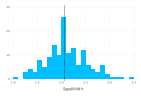

In [30]:
p = plot(iris, x="SepalWidth",
    xintercept=[mean(iris[!, :SepalWidth])],
    Geom.vline(color=["black"]),
    Geom.histogram)

## 斜線

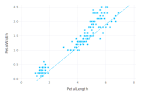

In [18]:
p = plot(iris, x="PetalLength",
    y="PetalWidth",
    Geom.point,  
    
    intercept=[-0.5],
    slope=[0.4],
    Geom.abline(style=:dashdot))

In [10]:
draw(PNG("abline.png", 12cm, 9cm), p)

## 資料點標籤

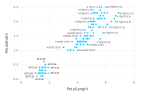

In [19]:
p = plot(iris, x="PetalLength", y="PetalWidth", Geom.point,
    label="Species", Geom.label)

In [20]:
draw(PNG("label.png", 12cm, 9cm), p)

## 子圖

┌ Warning: background is not a recognized aesthetic. Ignoring.
└ @ Gadfly C:\Users\Delta\.julia\packages\Gadfly\USbaq\src\mapping.jl:63


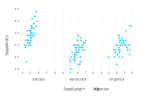

In [29]:
p = plot(iris,
    xgroup="Species",
    x="SepalLength",
    y="SepalWidth",
    background = "green",
    Geom.subplot_grid(Geom.point))

In [22]:
draw(PNG("subplot.png", 12cm, 9cm), p)